In [22]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m
from __future__ import print_function

In [23]:
y = np.genfromtxt('jaafar.csv',delimiter=';')

#data = [1] * 3 + [2] * 3
#data *= 3

#data = y[1:120];

#y = pd.read_csv('jaafar.csv',delimiter=";",header=None)
data = y
data

array([  1.        ,  17.77777778,   0.62893082,  13.75      ])

In [24]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [25]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 33, 1, 
                   hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [26]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 60
CYCLES = 100
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 6000/6000
final error = 6.8667476793e-10


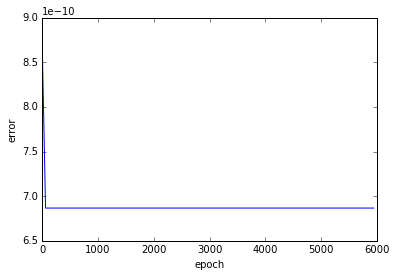

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')

In [28]:
arr  = np.zeros(data.size)
i = 0;
for i in range(np.size(data)):
    arr[i] = net.activate(data[i])

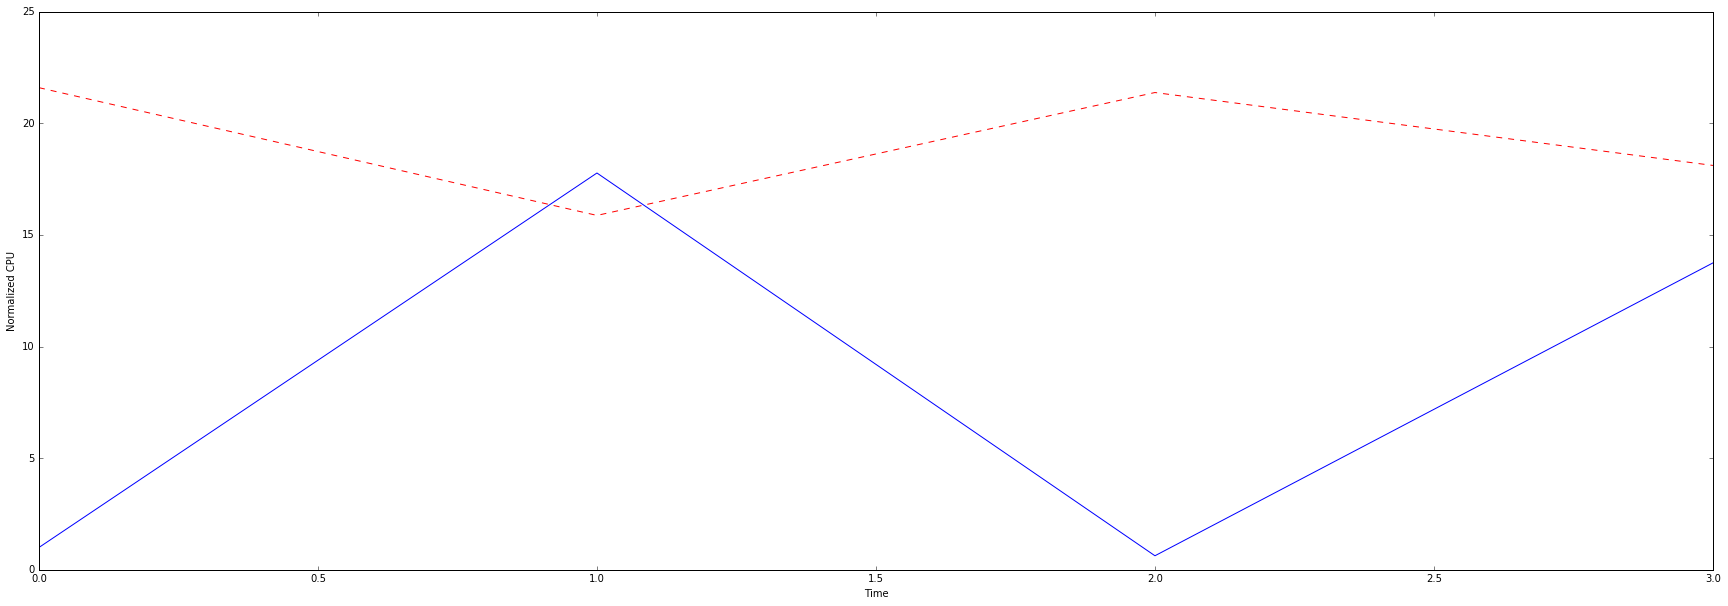

In [29]:
tmps = np.arange(data.size)
plt.subplots(figsize=(30, 10))
plt.plot(tmps,data,'b-')
plt.plot(tmps,arr,'r--')
plt.xlabel('Time')
plt.ylabel('Normalized CPU')